<a href="https://colab.research.google.com/github/travisjwiltshire/CSAI_statistical_modeling_group/blob/master/linear_regression_and_its_pvalues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression and its p-values





## Dataset

The movie [Moneyball](https://en.wikipedia.org/wiki/Moneyball_(film)) focuses on the "quest for the secret of success in baseball". It follows a low-budget team, the Oakland Athletics, who believed that underused statistics, such as a player's ability to get on base, better predict the ability to score runs than typical statistics like home runs, RBIs (runs batted in), and batting average. Obtaining players who excelled in these underused statistics turned out to be much more affordable for the team.

We'll be looking at data from all 30 Major League Baseball teams from **2011** and examine their **linear relationship between runs scored in a season and a number of other player statistics**. Our aim will be to summarize these relationships both graphically and numerically in order to find which variable, if any, helps us best predict a team's runs scored in a season.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from scipy import stats

!gdown --id 19xxb9G4tYRweuZYIeT3wqp84tHBT8A90
baseball = pd.read_csv('BaseballStats.csv')
baseball.head()

Downloading...
From: https://drive.google.com/uc?id=19xxb9G4tYRweuZYIeT3wqp84tHBT8A90
To: /content/BaseballStats.csv
100% 2.21k/2.21k [00:00<00:00, 1.71MB/s]


,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
0,Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
1,Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
2,Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
3,Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
4,St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766


Here are the descriptions of the variables in this dataset:

*  team: Team name
*  runs: Number of runs

*Traditional variables for predicting the number of runs*
*  at_bats: Number of at bats (the number of times a batter had a turn batting against a pitcher)
*  hits: Number of hits (when the batter safely reaches or passes first base after hitting the ball into fair territory)
*  homerun: Number of home runs.
*  bat_avg: Batting average (the number of hits divided by at bats)
*  strikeouts: Number of strikeouts (when a batter racks up three strikes during a time at bat).
*  stolen_bases: Number of stolen bases (when a runner advances to a base to which he is not entitled)
*  wins: Number of wins.

*New variables for predicting the number of runs*
*  new_onbase: On base percentage, measure of how often a batter reaches base for any reason other than a fielding error, fielder's choice, dropped/uncaught third strike, fielder's obstruction, or catcher's interference.
*  new_slug: Slugging percentage, measure of the power of a hitter calculated as the total bases divided by at bats.
*  new_obs: On base plus slugging, calculated as the sum of these two variables


# Simple Linear Regression

**Main goal**
The main goal is to explain statistical hypothesis testing in a simple linear regression by manually computing its test-statistic and p-value.

**Substeps**

1. Checking assumptions:  Evaluate the **direction** (positive, negative), **form** (linear or not linear) and **strength**  of the association between the explanatory and response numerical variables
2. Fit a linear regression model $y = \beta_0 + \beta_1 x$ using the equations explained in the slides
- Compute manually and with software the point estimates (estimated from observed data) $b_0, b_1$ for $\beta_0, \beta_1$ 
- Define the least squares line as the line that minimizes the sum of the squared residuals, and list conditions necessary for fitting such line:
    - linearity
    - nearly normal residuals
    - constant variability

where $x$ is known as the **explanatory** variable, $y$ the **response** variable, $\beta_1$ the slope coefficient and $b_0$ is the intercept/bias coefficient.



## Hypothesis-testing
<a id='Hypothesis-testing'></a>

We start with a simple linear regression model 

$$y = \beta_0 + \beta_1 x + \epsilon$$


First, we want to see what is the effect of $hits$ on $runs_scored$ in a season 

$$\hat{y} = \hat{\beta_0} + \hat{\beta_1} x $$

- **Residuals** $e_i = y_i -\hat{y}$
- **Estimator**
    - *Least Squares* : Minimize the sum of squares of the residuals
        - Real parameters: $(\beta_0,\beta_1)$
        - Estimated parameters: $(b_0,b_1)$ (Point estimates) 
            - $b_1 = r \frac{S_y}{S_x}$
            - $b_0 = \bar{y}- b_1\bar{x}$ since $ \hat{y} = b_0 + b_1 x$

Here, we show what p-value and hypothesis testing means in linear regression. 

We are interested whether a explanatory varaible $X_i$ affect the response variable $Y$.

The hypothesis that describes this is:

<font color='blue'>
    
$H_0$: $\beta = 0$ Hits do not affect runs scored in a season <br>
$H_1$: $\beta \ne 0$ Hits do  affect runs scored in a season 


</font>

## 1. Checking assumptions

First we need to evaluate the **direction** (positive, negative), **form** (linear or not linear) and **strength**  of the association between the explanatory and response numerical varaibles to determine whether it makes sense to fit a linear model.

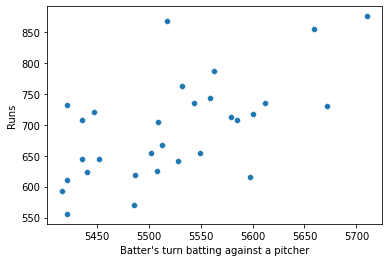

In [ ]:
sns.scatterplot(y=baseball.runs, x=baseball.at_bats)
plt.ylabel('Runs')
plt.xlabel("Batter's turn batting against a pitcher")
plt.show()

<font color='red'>The relationship between the two variables seems **linear, upward sloping, and moderately strong**. For those reasons, we are comfortable fitting a linear model to this data</font>

## 2. Fitting our model with statsmodels

Once the assumptions have been met we can now fit our linear model. We are goint to start of fitting our model with the `statsmodels` api.

In [ ]:
formula_string = "runs ~ at_bats"

model = sm.formula.ols(formula = formula_string, data = baseball)
model_fitted = model.fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     16.65
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           0.000339
Time:                        21:47:00   Log-Likelihood:                -167.44
No. Observations:                  30   AIC:                             338.9
Df Residuals:                      28   BIC:                             341.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2789.2429    853.696     -3.267      0.0

## 3. Fitting our model manually

Here, we fit the model manually using the equations shown in the slides.




Estimated parameters: $(\hat{\beta}_0,\hat{\beta}_1, \hat{\sigma})$ (Point estimates) :
- $\hat{\beta}_1 = \frac{\sum (X_i -\bar{X})(Y_i -\bar{Y})}{\sum (X_i -\bar{X})^2} = \frac{S_{XY}}{S_{XX}}$
- $\hat{\beta}_0 = \bar{Y}- \hat{\beta}_1\bar{X}$
- $\hat{\sigma}^2 = \frac{1}{n-2} RSS$

In [ ]:
y = baseball.runs.values
x = baseball.at_bats.values
n = len(x)
y_mean = y.mean()
x_mean = x.mean()

# parameter estimation
b1 = np.sum((x-x_mean)*(y-y_mean))/np.sum((x-x_mean)**2)
b0 = y_mean - b1 * x_mean

# estimated model
y_hat = b0 + b1*x


# compute variance of the random error
n = len(x)
residuals = y-y_hat
RSS = np.sum(residuals**2)

hat_var =  RSS/(n-2)
hat_sigma = np.sqrt(hat_var)

## 4. Comparing `statsmodel api` with manual fitting

Estimated linear model: y = -2789.2429 + 0.6305*av_bats


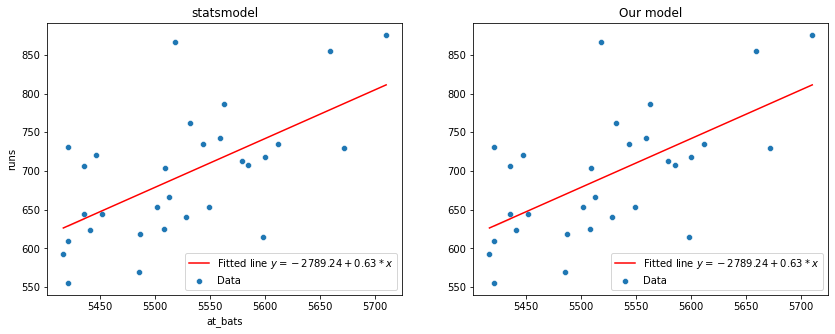

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(2*7,5))

# Statsmodel 
text = 'Fitted line $y = {:.2f} + {:.2f}*x$'.format(model_fitted.params['Intercept'],model_fitted.params['at_bats'])
sns.scatterplot(y=baseball.runs, x=baseball.at_bats, label='Data', ax=ax[0])
sns.lineplot(x=baseball.at_bats.values, y=model_fitted.params['Intercept'] + model_fitted.params['at_bats']*baseball.at_bats.values, color='r', label=text, ax=ax[0])
ax[0].set_title('statsmodel')

# # Using sns regplot
print('Estimated linear model: y = {:.4f} + {:.4f}*av_bats'.format(b0,b1))
sns.scatterplot(x=x, y=y, label='Data')
sns.lineplot(x=baseball.at_bats.values, y=y_hat, color='r',label='Fitted line $y = {:.2f} + {:.2f}*x$'.format(b0,b1))
ax[1].set_title('Our model')
plt.show()

## 5. Variances of the least squares estimators

Recall that $\hat{\beta}_k$ is a *point estimate* of $\beta_k$. The standard error of $\hat{\beta}_k$ tell us how the point estimate is likely to vary from the corresponding population parameter.

The formula for simple linear regression is 

$$V[\hat{\beta}_0] = \hat{\sigma} \frac{RSS}{n  S_{XX}}$$
$$V[\hat{\beta}_1] =  \frac{\hat{\sigma}}{S_{XX}}$$
- RSS : Residuals Sum of Squares $RSS= \sum_i^n (y_i-\hat{y})^2$



In [ ]:
s_xx = np.sum((x-x_mean)**2)

# variance of betas estimator
var_b1 = hat_var/s_xx
var_b0 = hat_var *np.sum(x**2)/(n*s_xx)

## 6. T-statistics 

Broadly speaking a test-statistics will help us to find how far our estimated value is from the null hypothesis.
For a random varaible this will typically refer to the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error.

In this case, our estimate $\hat{\beta}_k$ has a t-distribution. 



$$T = \dfrac{\hat{\beta}_k - 0}{\sigma_{\hat{\beta}_k}}= \dfrac{\hat{\beta}_k - 0}{SE_{\hat{\beta}_k}}$$


In [ ]:
t_score_b1 = b1/np.sqrt(var_b1)
t_score_b1

4.080136268863347

## 7. P-value



In [ ]:
def get_p_value(t_score, df, two_tails=True):
    p_value = stats.t.sf(np.abs(t_score),df)
    if two_tails:
        p_value *= 2
    return p_value

def get_p_value2(t_score, df, two_tails=True):
    p_value = 1-stats.t.cdf(np.abs(t_score), df)
    if two_tails:
        p_value *= 2
    return p_value

In [ ]:
p_value_b1 = get_p_value(t_score_b1, n-2)
print(get_p_value(t_score_b1, n-2))
print(get_p_value2(t_score_b1, n-2))

0.0003388351359791947
0.00033883513597920967


In [ ]:
t_score_b0 = b0/np.sqrt(var_b0)
p_value_b0 = get_p_value(t_score_b0, n-2)
print(p_value_b0)
print(get_p_value2(t_score_b0, n-2))

0.002870550837586551
0.002870550837586583


## 8. Confidence Intervals

To estimate the uncertainty about this estimates we can create a confidence interval of our paramters 

$$ \hat{\beta}_k\pm t*SE$$

In [ ]:
def get_confidence_interval(parameter, confidence, SE, df):
    t_value = stats.t.ppf((1 + confidence) / 2., df)
    error = t_value * SE
    return (parameter-error, parameter+error )

In [ ]:
ci_b0 = get_confidence_interval(b0, 0.95, np.sqrt(var_b0), df=n-2)
ci_b1 = get_confidence_interval(b1, 0.95, np.sqrt(var_b1), df=n-2)
print('Confidence Interval for beta0:', ci_b0)
print('Confidence Interval for beta1:',ci_b1)

Confidence Interval for beta0: (-4537.959298220906, -1040.5264726636067)
Confidence Interval for beta1: (0.31398627450230154, 0.9471137111742646)


## 9. Assessing the Overall Accuracy of the Model $R^2$

$$R^2 = \frac{TSS-RSS}{TSS}$$

In [ ]:
TSS = np.sum((y-y.mean())**2)

r_square = (TSS-RSS)/TSS
r_square

0.3728653901868065

In [ ]:
parameters ={}
parameters['hat_beta_1'] = b1
parameters['hat_beta_0'] = b0
parameters['hat_sigma'] = hat_sigma
parameters['hat_sigma_beta_0'] = np.sqrt(var_b0)
parameters['hat_sigma_beta_1'] = np.sqrt(var_b1)
parameters['t_beta_1'] = t_score_b1
parameters['t_beta_0'] = t_score_b0
parameters['p_beta_0'] = p_value_b0
parameters['ci_b0'] = ci_b0
parameters['ci_b1'] = ci_b1
parameters['r_square']= r_square
parameters

{'ci_b0': (-4537.959298220906, -1040.5264726636067),
 'ci_b1': (0.31398627450230154, 0.9471137111742646),
 'hat_beta_0': -2789.2428854422565,
 'hat_beta_1': 0.6305499928382831,
 'hat_sigma': 66.47283773560623,
 'hat_sigma_beta_0': 853.6957214697355,
 'hat_sigma_beta_1': 0.15454140530800042,
 'p_beta_0': 0.002870550837586551,
 'r_square': 0.3728653901868065,
 't_beta_0': -3.2672564888110878,
 't_beta_1': 4.080136268863347}

## 10. Model diagnostics


To assess whether the linear model is reliable, we need to check for 

- (1) linearity, 
- (2) nearly normal residuals, and 
- (3) constant variability.


In [ ]:
def run_analysis(variables):
    n_rows = len(variables)
    fig, axs = plt.subplots(n_rows, 4, figsize=(4*7,n_rows*6))
    ax = axs.flatten()

    for i, explanatory_variable in enumerate(variables):

        correlation = baseball[explanatory_variable].corr(baseball['runs'])
        sns.scatterplot(x=explanatory_variable, y="runs", data=baseball, ax=ax[4*i +0])
        ax[4*i + 0].set_title(explanatory_variable + ' vs runs with correlation {:.4f}'.format(correlation))

        formula_string = "runs ~ {}".format(explanatory_variable)
        model = sm.formula.ols(formula = formula_string, data = baseball)
        model_fitted = model.fit()

        # compute residuals
        y = baseball.runs.values
        yhat = model_fitted.params['Intercept'] + model_fitted.params[explanatory_variable]*baseball[explanatory_variable].values
        e = y-yhat

        sns.residplot(x=explanatory_variable, y="runs", data=baseball, ax=ax[4*i +1])
        ax[4*i +1].set_title('Residuals')

        sns.histplot(e, ax=ax[4*i +2])
        ax[4*i +2].set_xlabel('Residuals')
        ax[4*i +2].set_title('Histogram')

        sm.qqplot(e, ax=ax[4*i +3])
        ax[4*i +3].set_title('QQplot')
    plt.show()

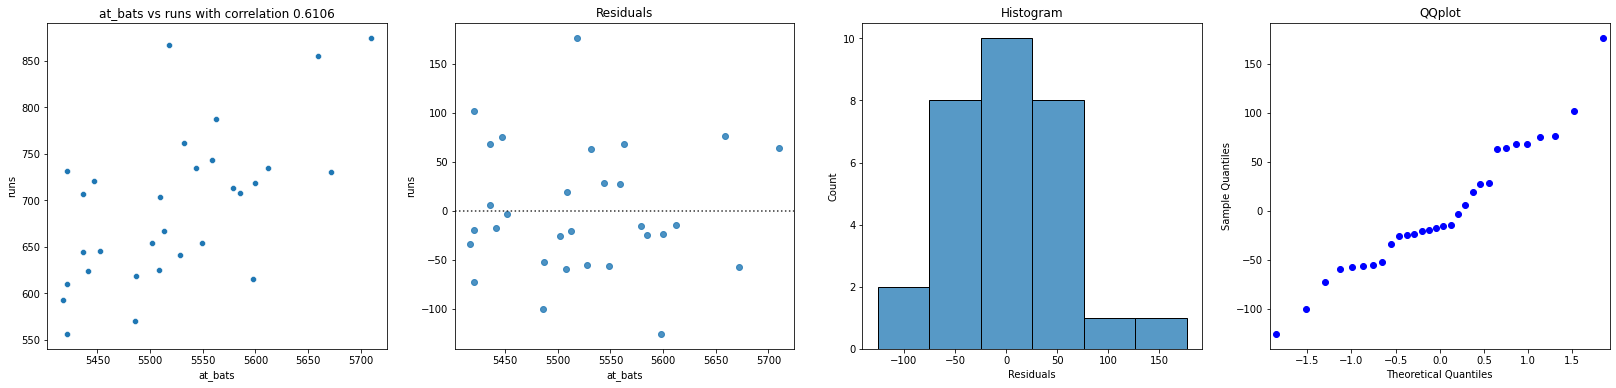

In [ ]:
traditional_variables = ['at_bats'] #, 'homeruns', 'bat_avg', 'strikeouts', 'wins']
run_analysis(traditional_variables)

It seems to be some deviations from normality, both in the qq-plot and the histogram, but these are not very pronounced

# Multivariate linear regression

In this section we are going to  <span style="color:red"> The search for the best model </span> using the **backward selection with the p-value** method!.

Steps:

1. Starts with the full model.
2. Drop the variable with the highest p-value and refit a smaller model
3. Repeat until all variables left in the model are statistically significant 


In [ ]:
explainatory_variables = ['at_bats', 'hits', 'homeruns', 'bat_avg', 'strikeouts','stolen_bases', 'wins', 'new_onbase', 'new_slug', 'new_obs']

# start
print('Fitting the model')
m_full = sm.formula.ols(formula = 'runs ~ ' +  '+'.join(explainatory_variables), data = baseball)
multi_reg = m_full.fit()


# refit model
for i in range(len(explainatory_variables)):
    # get variable wiht highest p-value and remove it if > 0.005
    variable_with_highest_pvalue = multi_reg.pvalues[1:].sort_values(ascending=False).keys()[0]
    p_value = multi_reg.pvalues[variable_with_highest_pvalue]
    
    if (p_value > 0.05):
        print('Dropping variable with the highest p-value : ' + variable_with_highest_pvalue + ' with p-value: ',  p_value)
        print(variable_with_highest_pvalue)
        variable_to_remove = variable_with_highest_pvalue.split('[')[0]
        explainatory_variables.remove(variable_to_remove)

        # fit model
        print('ReFitting the model')
        m_full = sm.formula.ols(formula = 'runs ~ ' +  '+'.join(explainatory_variables), data = baseball)
        multi_reg = m_full.fit()
    else:
        print('Final model')
        print(multi_reg.summary())
        break;

Fitting the model
Dropping variable with the highest p-value : wins with p-value:  0.7854185151408594
wins
ReFitting the model
Dropping variable with the highest p-value : new_onbase with p-value:  0.611889128813334
new_onbase
ReFitting the model
Dropping variable with the highest p-value : strikeouts with p-value:  0.5350119201403949
strikeouts
ReFitting the model
Dropping variable with the highest p-value : homeruns with p-value:  0.28065370031714987
homeruns
ReFitting the model
Dropping variable with the highest p-value : at_bats with p-value:  0.37436361754415015
at_bats
ReFitting the model
Dropping variable with the highest p-value : hits with p-value:  0.11361058941998753
hits
ReFitting the model
Dropping variable with the highest p-value : bat_avg with p-value:  0.16240008371800368
bat_avg
ReFitting the model
Dropping variable with the highest p-value : new_slug with p-value:  0.345724093350269
new_slug
ReFitting the model
Final model
                            OLS Regression R

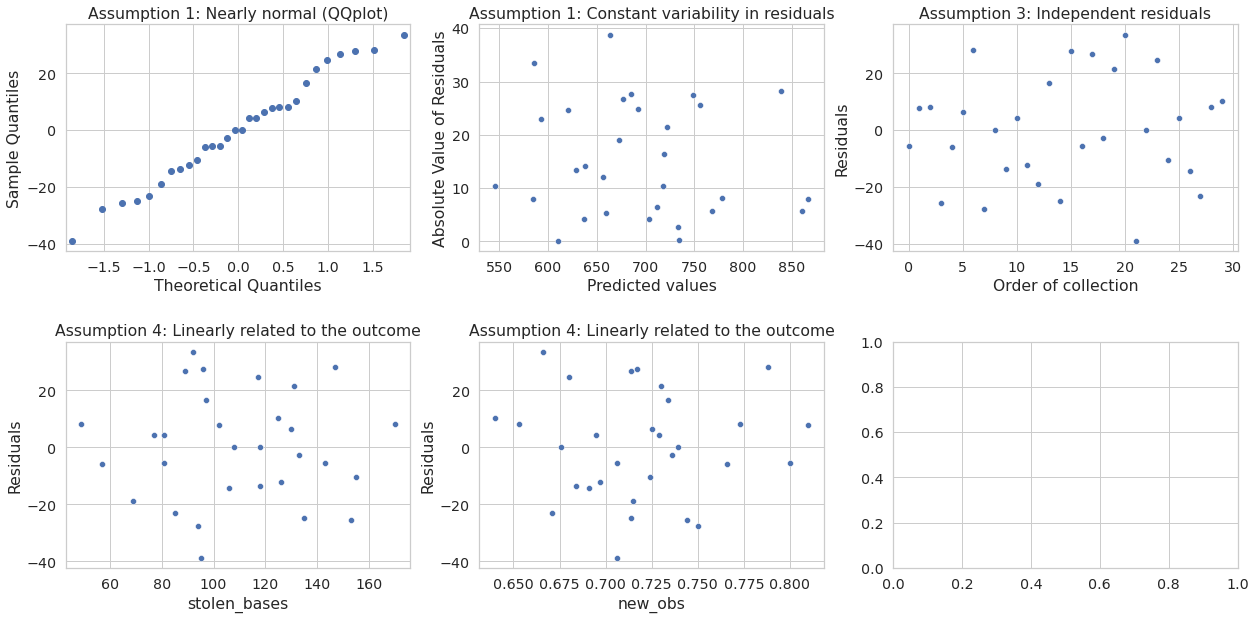

In [ ]:
sns.set(font_scale=1.3)
sns.set_style("whitegrid")

# get predictions and residuals
predicted_value = multi_reg.predict()
residuals = y - predicted_value

fig, axs = plt.subplots(2, 3, figsize=(3*7,2*5))
ax = axs.flatten() 


# a histogram and QQ-plot of the residuals
sm.qqplot(residuals, ax=ax[0])
ax[0].set_title('Assumption 1: Nearly normal (QQplot)')

# scatterplot of the (absolute) residuals (y-axis) against the predicted values (x-axis)
sns.scatterplot(x=predicted_value, y=np.abs(residuals), ax=ax[1])
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Absolute Value of Residuals')
ax[1].set_title('Assumption 1: Constant variability in residuals')

# scatterplot of the residuals (y-axis) against the order of collection (x-axis) 
sns.scatterplot(x=np.arange(residuals.size), y=residuals, ax=ax[2])
ax[2].set_xlabel('Order of collection')
ax[2].set_ylabel('Residuals')
ax[2].set_title('Assumption 3: Independent residuals')

# scatterplots of the residuals (y-axis) against each of the explanatory variables (x-axis)
for i, explanatory_var in enumerate(multi_reg.params[1:].keys()):
        sns.scatterplot(x=explanatory_var.split('[')[0], y=residuals, data=baseball, ax=ax[i+3])
        ax[i+3].set_title('Assumption 4: Linearly related to the outcome')
        ax[i+3].set_ylabel('Residuals')

fig.subplots_adjust(hspace=0.4)
plt.show()